# Домашняя работа по теме "Тематическое моделирование"

Классификация по тональности

В этом домашнем задании вам предстоит классифицировать по тональности отзывы на банки с сайта banki.ru.

Данные содержат непосредственно тексты отзывов, некоторую дополнительную информацию, а также оценку по шкале от 1 до 5.

Тексты хранятся в json-ах в массиве responses.

In [1]:
import json
import bz2
from tqdm import tqdm
import numpy as np
import nltk
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
responses = []
with bz2.BZ2File('banki_responses.json.bz2', 'r') as thefile:
    for row in tqdm(thefile):
        resp = json.loads(row)
        if not resp['rating_not_checked'] and (len(resp['text'].split()) > 0):
            responses.append(resp)

201030it [02:02, 1643.15it/s]


In [3]:
responses[150]

{'city': 'г. Москва',
 'rating_not_checked': False,
 'title': 'Бенефит отказывается выполнять условия договора вклада',
 'num_comments': 8,
 'bank_license': 'лицензия № 3229',
 'author': 'jktu.hmtdbx',
 'bank_name': 'Бенифит-Банк',
 'datetime': '2015-06-04 19:44:58',
 'text': '04.06.2015 года Банк отказал мне в операции: пополнение вклада. Банк в одностороннем порядке изменил существенные условия договора вклада. Банк нарушил требование статьи 450 ГК РФ.\xa0Основания изменения и расторжения договора:\xa0Изменение и расторжение договора возможны по соглашению сторон. А в соответствие со статьей 452 ГК РФ\xa0Соглашение об изменении или о расторжении договора совершается в той же форме, что и договор.',
 'rating_grade': None}

## Часть 1. Анализ текстов
p.s. сделала на выборке размером 10000

1. Посчитайте количество отзывов в разных городах и на разные банки

In [4]:
res = responses[:10000]

In [89]:
from collections import Counter
import re

In [112]:
def extract_city(city_text):
    '''Извлекает название города из строки, приводит к одному регистру и убирает лишние пробелы'''
    if not isinstance(city_text, str):
        return ''
    match_ = re.search(r'\b(?:г\.|с\.|город|село)\s+([^\s,]+)', city_text, re.IGNORECASE)
    if match_:
        city_name = str(match_.group(1))
    else:
        city_name = city_text
    return city_name.lower().strip()

In [114]:
# Подсчет количества отзывов по городам
city_counts = Counter(extract_city(review['city']) for review in responses)
sorted_city_counts = city_counts.most_common()
print('Количество отзывов в разных городах:')
for city, count in sorted_city_counts:
    print(f"{city}: {count}")

Количество отзывов в разных городах:
москва: 57055
: 15174
санкт-петербург: 14731
екатеринбург: 2390
новосибирск: 2389
нижний: 2276
ростов-на-дону: 1938
самара: 1803
челябинск: 1549
казань: 1534
уфа: 1337
краснодар: 1310
красноярск: 1265
воронеж: 1243
пермь: 1205
омск: 1073
волгоград: 1063
саратов: 980
иркутск: 778
калининград: 771
хабаровск: 709
ставрополь: 708
тюмень: 682
владивосток: 660
барнаул: 636
ярославль: 629
тула: 615
томск: 598
рязань: 575
тольятти: 533
ульяновск: 519
липецк: 477
ижевск: 471
иваново: 470
тверь: 468
мурманск: 451
пенза: 451
оренбург: 445
спб: 438
магнитогорск: 422
кемерово: 417
сочи: 408
чебоксары: 407
белгород: 400
курск: 381
владимир: 378
новокузнецк: 348
калуга: 347
мытищи: 345
подольск: 341
астрахань: 340
архангельск: 339
королев: 338
набережные: 335
балашиха: 331
вологда: 320
химки: 298
киров: 288
брянск: 286
петрозаводск: 285
люберцы: 284
таганрог: 274
тамбов: 271
санкт: 271
смоленск: 250
орел: 244
новороссийск: 238
великий: 238
одинцово: 232
сергиев: 2

In [96]:
def normalize_text(text):
   '''Приводит строку с названием банка к нижнему регистру, убирает лишние пробелы '''
   return text.lower().strip()

In [115]:
# Подсчет количества отзывов по банкам
bank_counts = Counter(normalize_text(review['bank_name']) for review in responses)
sorted_bank_counts = bank_counts.most_common()
print('Количество отзывов на разные банки:')
for bank, count in sorted_bank_counts:
    print(f"{bank}: {count}")

Количество отзывов на разные банки:
сбербанк россии: 26327
альфа-банк: 10224
втб 24: 8185
русский стандарт: 7943
хоум кредит банк: 7549
тинькофф банк: 5387
национальный банк «траст»: 4607
ренессанс кредит: 3849
связной банк: 3775
отп банк: 3237
восточный экспресс банк: 3138
райффайзенбанк: 3057
московский кредитный банк: 2944
ситибанк: 2848
авангард: 2733
промсвязьбанк: 2586
юникредит банк: 2488
банк москвы: 2456
ханты-мансийский банк открытие: 2158
мтс банк: 1870
киви банк: 1741
кредит европа банк: 1683
росбанк: 1658
бинбанк: 1646
бинбанк кредитные карты: 1464
сетелем банк: 1351
московский областной банк: 1277
юниаструм банк: 1111
современный коммерческий банк (бывш. джии мани банк): 993
уралсиб: 989
айманибанк: 925
совкомбанк: 919
абсолют банк: 782
мдм банк: 776
русфинанс банк: 723
русславбанк: 715
2т банк: 655
сб банк (судостроительный банк): 555
фк открытие (бывш. номос-банк): 549
россельхозбанк: 532
уральский банк реконструкции и развития: 532
пробизнесбанк: 521
газпромбанк: 505
л

2. Постройте гистограмы длин отзывов в символах и в словах

In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Подсчет длин отзывов в символах и в словах
lengths_in_chars = [len(review['text']) for review in responses]  # Длина каждого отзыва в символах
lengths_in_words = [len(nltk.word_tokenize(review['text'])) for review in responses]  # Длина каждого отзыва в словах

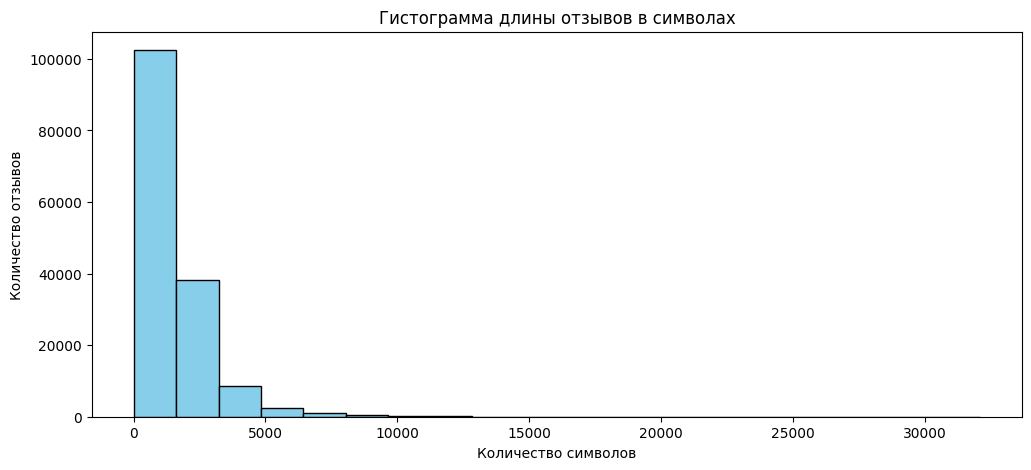

In [ ]:
# Построение гистограммы длины отзывов в символах
plt.figure(figsize=(12, 5))
plt.hist(lengths_in_chars, bins=20, color='skyblue', edgecolor='black')
plt.title('Гистограмма длины отзывов в символах')
plt.xlabel('Количество символов')
plt.ylabel('Количество отзывов')
plt.show()

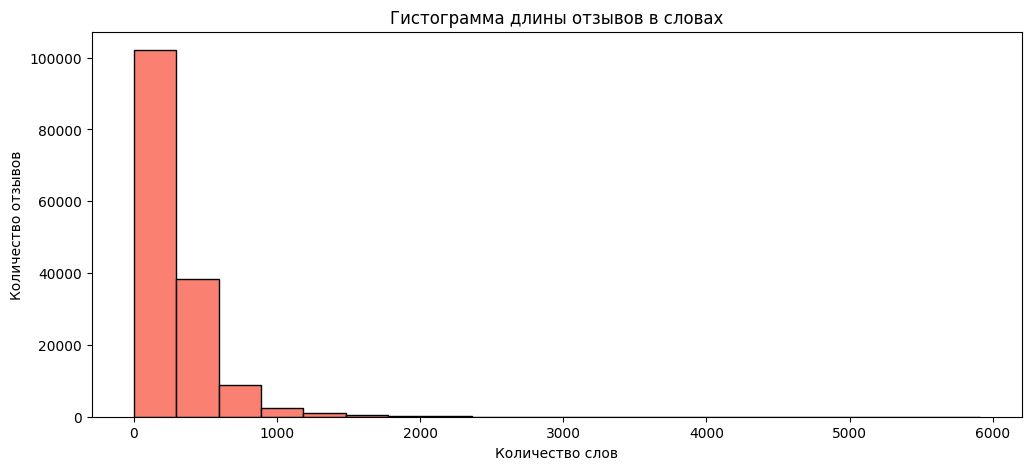

In [ ]:
# Построение гистограммы длины отзывов в словах
plt.figure(figsize=(12, 5))
plt.hist(lengths_in_words, bins=20, color='salmon', edgecolor='black')
plt.title('Гистограмма длины отзывов в словах')
plt.xlabel('Количество слов')
plt.ylabel('Количество отзывов')
plt.show()

3. Найдите 10 самых частых:
* слов
* слов без стоп-слов
* лемм
* существительных

In [7]:
from nltk.corpus import stopwords
from string import punctuation

In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
# Собираем все тексты отзывов в один список
texts = [review['text'] for review in res]

In [12]:
# Токенизация и подсчет самых частых слов
all_words = [word.lower() for text in texts for word in nltk.word_tokenize(text) if word not in punctuation]
most_common_words = Counter(all_words).most_common(10)
print('10 самых частых слов:')
print(most_common_words)

10 самых частых слов:
[('в', 74867), ('и', 60531), ('не', 49674), ('на', 41028), ('что', 35465), ('я', 33397), ('с', 27774), ('по', 22361), ('мне', 19029), ('банка', 16675)]


In [10]:
stop_words = stopwords.words('russian')

In [13]:
# Подсчет самых частых слов без стоп-слов
stop_words = stopwords.words('russian')
filtered_words = [word for word in all_words if word not in stop_words and word.isalpha()]
most_common_filtered_words = Counter(filtered_words).most_common(10)
print('10 самых частых слов без стоп-слов:')
print(most_common_filtered_words)

10 самых частых слов без стоп-слов:
[('банка', 16675), ('банк', 12868), ('это', 10107), ('деньги', 6986), ('карты', 5964), ('карту', 5618), ('день', 4711), ('кредит', 4631), ('заявление', 3933), ('банке', 3776)]


In [11]:
!pip install pymorphy2

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 57.6 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=cbec3ef5a29f167b136027e3b7483f1064c2758e638e44f3c7873358716c20f6
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [12]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

In [117]:
def lemmatize_text(text):
   ''' Лемматизирует текст с использованием pymorphy2'''
   tokens = nltk.word_tokenize(text.lower())
   lemmas = [morph.parse(token)[0].normal_form for token in tokens if token.isalpha() and token not in stop_words]
   return lemmas

In [28]:
# Лемматизация отзывов и подсчет самых частых лемм
all_lemmas = [lemma for text in texts for lemma in lemmatize_text(text)]
most_common_lemmas = Counter(all_lemmas).most_common(10)

print('10 самых частых лемм:')
print(most_common_lemmas)

10 самых частых лемм:
[('банк', 39255), ('карта', 18713), ('мой', 11135), ('это', 11026), ('день', 10002), ('кредит', 9710), ('деньга', 9480), ('сотрудник', 9347), ('который', 9097), ('клиент', 7789)]


In [19]:
def extract_nouns(text):
    '''Извлекает леммы существительных в тексте отзывов '''
    tokens = nltk.word_tokenize(text.lower())
    nouns = [
        morph.parse(token)[0].normal_form
        for token in tokens
        if token.isalpha() and morph.parse(token)[0].tag.POS == 'NOUN'
    ]
    return nouns

In [20]:
# Извлечение всех существительных из отзывов и подсчет самых частых
all_nouns = [noun for text in texts for noun in extract_nouns(text)]
most_common_nouns = Counter(all_nouns).most_common(10)

print('10 самых частых существительных:')
print(most_common_nouns)

10 самых частых существительных:
[('банк', 39255), ('карта', 18713), ('день', 10002), ('кредит', 9710), ('деньга', 9480), ('сотрудник', 9347), ('клиент', 7789), ('счёт', 7742), ('сумма', 6980), ('отделение', 6887)]


4. Постройте кривые Ципфа и Хипса

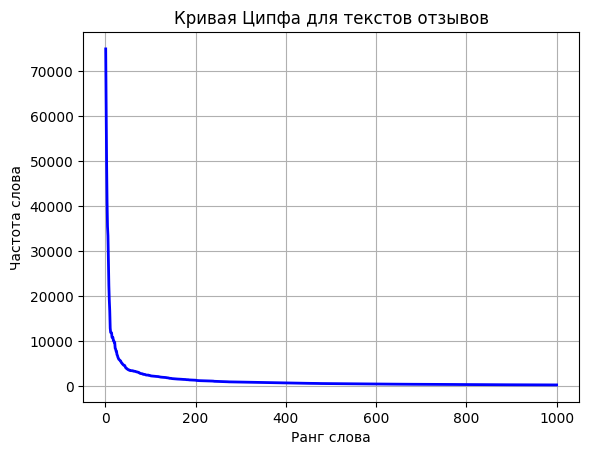

In [ ]:
# построение кривой Ципфа
freq_dict = Counter(all_words)
freqs = sorted(freq_dict.values(), reverse = True)

fig, ax = plt.subplots()
plt.plot(range(1, len(freqs[:1000]) + 1), freqs[:1000], color='blue', linewidth=2)
plt.title('Кривая Ципфа для текстов отзывов')
plt.xlabel('Ранг слова')
plt.ylabel('Частота слова')
plt.grid(True)
plt.show()

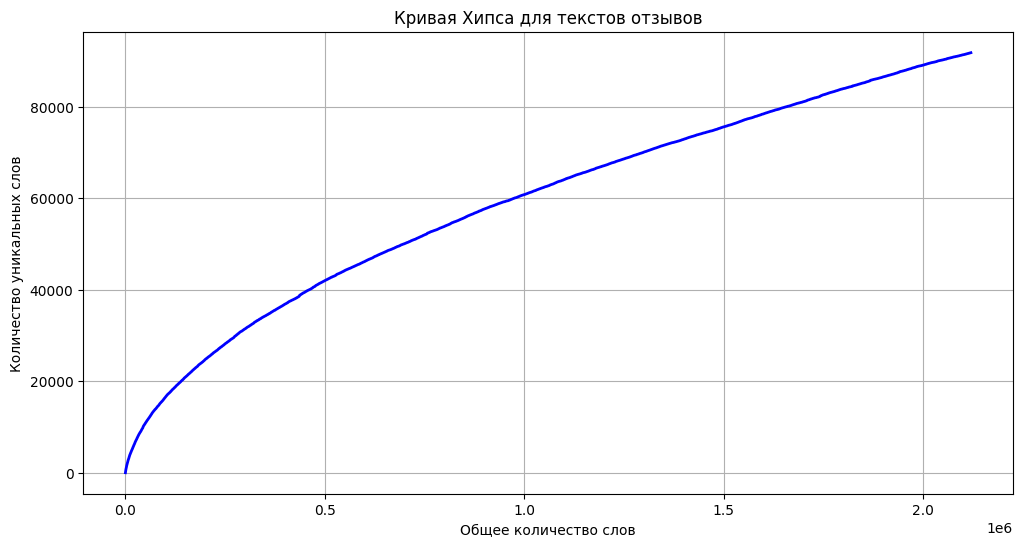

In [ ]:
# Построение кривой Хипса
unique_words = set()
total_words = []
unique_counts = []

for i, word in enumerate(all_words, start=1):
    unique_words.add(word)
    total_words.append(i)
    unique_counts.append(len(unique_words))


plt.figure(figsize=(12, 6))
plt.plot(total_words, unique_counts, color='blue', linewidth=2)
plt.title('Кривая Хипса для текстов отзывов')
plt.xlabel('Общее количество слов')
plt.ylabel('Количество уникальных слов')
plt.grid(True)
plt.show()

5. Ответьте на следующие вопросы:
* какое слово встречается чаще, "сотрудник" или "клиент"?
* сколько раз встречается слова "мошенничество" и "доверие"?

In [ ]:
# ранее уже извлекали все существительные
freq_nouns = Counter(all_nouns)

In [ ]:
# слово "сотрудник" встречается чаще, чем слово "клиент"
freq_nouns['сотрудник'], freq_nouns['клиент']

(9347, 7789)

In [ ]:
freq_nouns['мошенничество']

219

In [ ]:
freq_nouns['доверие']

151

6. В поле "rating_grade" записана оценка отзыва по шкале от 1 до 5. Используйте меру tf-idf, для того, чтобы найти ключевые слова и биграмы для положительных отзывов (с оценкой 5) и отрицательных отзывов (с оценкой 1)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
# Разделение отзывов на положительные и отрицательные
positive_reviews = [review['text'] for review in res if review['rating_grade'] == 5]
negative_reviews = [review['text'] for review in res if review['rating_grade'] == 1]

In [16]:
noise = stop_words + list(punctuation)

In [24]:
def get_top_keywords(texts, n=10):
    '''Вычисляет TF-IDF и извлекает ключевые слова и биграммы с учетом лемматизации текста и без стоп-слов и пунктуации '''
    lemmatized_texts = [' '.join(lemmatize_text(text)) for text in texts]

    vectorizer = TfidfVectorizer(
        max_df=0.9, min_df=2, stop_words=noise, ngram_range=(1, 2)
    )
    tfidf_matrix = vectorizer.fit_transform(lemmatized_texts)
    feature_names = vectorizer.get_feature_names_out()
    tfidf_scores = tfidf_matrix.sum(axis=0).A1

    keywords_df = pd.DataFrame({
        'term': feature_names,
        'tfidf': tfidf_scores
    }).sort_values(by='tfidf', ascending=False)

    return keywords_df.head(n)

In [29]:
# Получение топ-5 ключевых слов и биграмм для положительных и отрицательных отзывов
top_positive_keywords = get_top_keywords(positive_reviews, n=5)
top_negative_keywords = get_top_keywords(negative_reviews, n=5)

print('Топ-5 ключевых слов и биграмм для положительных отзывов:')
print(top_positive_keywords)

print('Топ-5 ключевых слов и биграмм для отрицательных отзывов:')
print(top_negative_keywords)

Топ-5 ключевых слов и биграмм для положительных отзывов:
           term      tfidf
130        банк  32.817872
2321      карта  23.331263
763       вклад  14.837653
6343  сотрудник  13.571346
4273      очень  13.111922
Топ-5 ключевых слов и биграмм для отрицательных отзывов:
            term       tfidf
770         банк  140.149092
14327      карта  117.801996
8314      деньга   70.676165
16671     кредит   63.097347
40207  сотрудник   61.367476


## Часть 2. Тематическое моделирование

1. Постройте несколько тематических моделей коллекции документов с разным числом тем. Приведите примеры понятных (интерпретируемых) тем.

In [26]:
from gensim import corpora, models
from gensim.models import CoherenceModel

In [17]:
lem_texts = [lemmatize_text(text) for text in texts]

In [31]:
dictionary = corpora.Dictionary(lem_texts)
corpus = [dictionary.doc2bow(text) for text in lem_texts]

In [32]:
def build_lda_model(num_topics, corpus, dictionary):
    '''Создает модель для вывода тем в отзывах '''
    lda_model = models.LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=num_topics,
        random_state=42,
        passes=10,
        alpha='auto'
    )
    return lda_model

In [33]:
# Построение моделей с разным числом тем
topic_nums = [3, 5, 10]
models = [build_lda_model(num_topics, corpus, dictionary) for num_topics in topic_nums]

In [34]:
for i, num_topics in enumerate(topic_nums):
    print(f'Темы для модели с {num_topics} темами:')
    topics = models[i].print_topics(num_words=5)
    for topic_num, topic in topics:
        print(f'Тема {topic_num + 1}: {topic}')

Темы для модели с 3 темами:
Тема 1: 0.036*"банк" + 0.022*"кредит" + 0.012*"мой" + 0.012*"сотрудник" + 0.011*"договор"
Тема 2: 0.036*"карта" + 0.029*"банк" + 0.015*"счёт" + 0.014*"деньга" + 0.011*"средство"
Тема 3: 0.028*"банк" + 0.012*"это" + 0.012*"вклад" + 0.010*"отделение" + 0.009*"карта"
Темы для модели с 5 темами:
Тема 1: 0.038*"банк" + 0.024*"кредит" + 0.012*"мой" + 0.012*"сотрудник" + 0.012*"договор"
Тема 2: 0.079*"карта" + 0.033*"банк" + 0.016*"кредитный" + 0.014*"комиссия" + 0.013*"рубль"
Тема 3: 0.020*"банк" + 0.014*"отделение" + 0.012*"это" + 0.011*"сказать" + 0.011*"сотрудник"
Тема 4: 0.025*"банк" + 0.021*"карта" + 0.020*"деньга" + 0.017*"счёт" + 0.014*"средство"
Тема 5: 0.044*"банк" + 0.034*"вклад" + 0.013*"это" + 0.011*"клиент" + 0.009*"деньга"
Темы для модели с 10 темами:
Тема 1: 0.039*"банк" + 0.019*"звонок" + 0.017*"мой" + 0.017*"номер" + 0.017*"сотрудник"
Тема 2: 0.045*"курс" + 0.036*"покупка" + 0.034*"доллар" + 0.033*"валюта" + 0.031*"евро"
Тема 3: 0.019*"сказать" + 

In [ ]:
# Примеры интерпретируемых тем:
# Тема 1: "банк" "кредит" "мой" "сотрудник" "договор" - может быть связана с заключением/изменением условий кредитного договора
# Тема 4: "банк" "карта" "деньга" "счёт" "средство" - может быть связана с операциями по счету
# Тема 2: "курс" "покупка" "доллар" "валюта" "евро" - явно связана  обменом/покупкой валюты
# Тема 7: "банк" "сумма" "платёж" "кредит" "кредитный" - наверняка связа с оплатой кредита

In [35]:
pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 62.6 MB/s eta 0:00:00


In [36]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

In [38]:
# Визуализация с использованием pyLDAvis
pyLDAvis.enable_notebook()
lda_vis = gensimvis.prepare(models[2], corpus, dictionary)
pyLDAvis.display(lda_vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2. Найдите темы, в которых упомянуты конкретные банки (Сбербанк, ВТБ, другой банк). Можете ли вы их прокомментировать / объяснить? Эта часть задания может быть сделана с использованием gensim.

In [ ]:
def find_topics_with_banks(lda_model, target):
    '''Осуществляет поиск тем с упоминанием определенных банков'''
    topics_with_banks = {}
    for topic_id, terms in lda_model.show_topics(formatted=False):
        bank_terms = [term for term, _ in terms if term in target]
        if bank_terms:
            topics_with_banks[topic_id] = bank_terms
    return topics_with_banks

In [43]:
target_banks = ['сбербанк', 'втб', 'альфа-банк', 'тинькофф']

topics_with_banks = find_topics_with_banks(models[2], target_banks)
for topic_id, banks in topics_with_banks.items():
    print(f'Тема {topic_id + 1}: содержит банки - {", ".join(banks)}')

Тема 4: содержит банки - сбербанк


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# по количеству отзывов на банки лидирует Сбербанк, поэтому упоминание его названия в текстах отзывов встречается часто

## Часть 3. Классификация текстов

Эта часть задания может быть сделана с использованием sklearn.

Сформулируем для простоты задачу бинарной классификации: будем классифицировать на два класса, то есть, различать резко отрицательные отзывы (с оценкой 1) и положительные отзывы (с оценкой 5).

1. Составьте обучающее и тестовое множество: выберите из всего набора данных N1 отзывов с оценкой 1 и N2 отзывов с оценкой 5 (значение N1 и N2 – на ваше усмотрение). Используйте sklearn.model_selection.train_test_split для разделения множества отобранных документов на обучающее и тестовое.

In [19]:
import random
from sklearn.model_selection import train_test_split

In [77]:
N1 = 10000  # Количество отрицательных отзывов с оценкой 1
N2 = 10000  # Количество положительных отзывов с оценкой 5

In [78]:
# Разделение отзывов на положительные и отрицательные
positive_reviews = [review['text'] for review in responses if review['rating_grade'] == 5]
negative_reviews = [review['text'] for review in responses if review['rating_grade'] == 1]

In [79]:
random.seed(52)
positive_sample = random.sample(positive_reviews, N2)
negative_sample = random.sample(negative_reviews, N1)

In [80]:
# Объединение выборок и создадание меток классов (0 - отрицательный, 1 - положительный)
reviews = positive_sample + negative_sample
labels = [1] * N2 + [0] * N1

In [82]:
X_train, X_test, y_train, y_test = train_test_split(reviews, labels, test_size=0.2, random_state=52)

print(f'Размер обучающей выборки: {len(X_train)} отзывов')
print(f'Размер тестовой выборки: {len(X_test)} отзывов')

Размер обучающей выборки: 16000 отзывов
Размер тестовой выборки: 4000 отзывов


2. Используйте любой известный вам алгоритм классификации текстов для решения задачи и получите baseline. Сравните разные варианты векторизации текста: использование только униграм, пар или троек слов или с использованием символьных n-грам.

In [60]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [51]:
vectorizers = {
    'Unigrams': TfidfVectorizer(ngram_range=(1, 1), stop_words=stop_words),
    'Bigrams': TfidfVectorizer(ngram_range=(2, 2), stop_words=stop_words),
    'Trigrams': TfidfVectorizer(ngram_range=(3, 3), stop_words=stop_words),
    'Unigrams and Bigrams': TfidfVectorizer(ngram_range=(1, 2), stop_words=stop_words),
    'Unigrams, Bigrams and Trigrams': TfidfVectorizer(ngram_range=(1, 3), stop_words=stop_words),
    'Character-level n-grams (3 to 5)': TfidfVectorizer(analyzer='char', ngram_range=(3, 5), stop_words=stop_words),
}

In [83]:
# Обучение и оценка модели на каждом варианте векторизации
results = {}
for name, vectorizer in vectorizers.items():
    model = make_pipeline(vectorizer, LogisticRegression(random_state=52, max_iter=1000))
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f'=== {name} ===')
    print(f'Accuracy: {accuracy:.4f}')
    print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

=== Unigrams ===
Accuracy: 0.9440
              precision    recall  f1-score   support

    Negative       0.93      0.95      0.94      1989
    Positive       0.95      0.93      0.94      2011

    accuracy                           0.94      4000
   macro avg       0.94      0.94      0.94      4000
weighted avg       0.94      0.94      0.94      4000

=== Bigrams ===
Accuracy: 0.9075
              precision    recall  f1-score   support

    Negative       0.89      0.92      0.91      1989
    Positive       0.92      0.89      0.91      2011

    accuracy                           0.91      4000
   macro avg       0.91      0.91      0.91      4000
weighted avg       0.91      0.91      0.91      4000

=== Trigrams ===
Accuracy: 0.8363
              precision    recall  f1-score   support

    Negative       0.82      0.86      0.84      1989
    Positive       0.86      0.81      0.83      2011

    accuracy                           0.84      4000
   macro avg       0.84    

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:543: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


=== Character-level n-grams (3 to 5) ===
Accuracy: 0.9515
              precision    recall  f1-score   support

    Negative       0.94      0.97      0.95      1989
    Positive       0.97      0.94      0.95      2011

    accuracy                           0.95      4000
   macro avg       0.95      0.95      0.95      4000
weighted avg       0.95      0.95      0.95      4000



In [84]:
# Сравнение результатов
best_vectorizer = max(results, key=results.get)
print('Лучший результат:')
print(f'{best_vectorizer} с точностью {results[best_vectorizer]:.4f}')


Лучший результат:
Character-level n-grams (3 to 5) с точностью 0.9515


3. Сравните, как изменяется качество решения задачи при использовании скрытых тем в качестве признаков:
* 1-ый вариант: tf-idf
 преобразование (sklearn.feature_extraction.text.TfidfTransformer) и сингулярное разложение (оно же – латентый семантический анализ) (sklearn.decomposition.TruncatedSVD),
* 2-ой вариант: тематические модели LDA (sklearn.decomposition.LatentDirichletAllocation).

Используйте accuracy и F-measure для оценки качества классификации.

In [68]:
# Создание pipeline для применения TF-IDF, Truncated SVD и Логистической регрессии
pipeline_1 = Pipeline([
    ('count_vectorizer', CountVectorizer()),        # Шаг 1: Count Vectorizer для построения матрицы слов
    ('tfidf_transformer', TfidfTransformer()),      # Шаг 2: Преобразование TF-IDF
    ('svd', TruncatedSVD(n_components=100, random_state=52)),  # Шаг 3: SVD для снижения размерности
    ('classifier', LogisticRegression(random_state=52, max_iter=1000))  # Шаг 4: Классификатор
])

In [85]:
# Обучение и предсказание модели 1-й вариант
pipeline_1.fit(X_train, y_train)
y_pred_1 = pipeline_1.predict(X_test)

In [86]:
# Оценка точности модели 1-й вариант
accuracy_1 = accuracy_score(y_test, y_pred_1)
f1_1 = f1_score(y_test, y_pred_1, average='weighted')

print(f'Accuracy: {accuracy_1:.4f}')
print(f'F1-score (weighted): {f1_1:.4f}')
print(classification_report(y_test, y_pred_1, target_names=['Negative', 'Positive']))

Accuracy: 0.9325
F1-score (weighted): 0.9325
              precision    recall  f1-score   support

    Negative       0.92      0.94      0.93      1989
    Positive       0.94      0.92      0.93      2011

    accuracy                           0.93      4000
   macro avg       0.93      0.93      0.93      4000
weighted avg       0.93      0.93      0.93      4000



In [71]:
# Создание pipeline для применения CountVectorizer, LDA и Логистической регрессии
pipeline_2 = Pipeline([
    ('count_vectorizer', CountVectorizer()),   # Шаг 1: Count Vectorizer для построения матрицы слов
    ('lda', LatentDirichletAllocation(n_components=10, random_state=52)),  # Шаг 2: LDA для выделения тем
    ('classifier', LogisticRegression(random_state=52, max_iter=1000))  # Шаг 3: Классификатор
])

In [87]:
# Обучение и предсказание модели 2-й вариант
pipeline_2.fit(X_train, y_train)
y_pred_2 = pipeline_2.predict(X_test)

In [88]:
# Оценка точности модели 2-й вариант
accuracy_2 = accuracy_score(y_test, y_pred_2)
f1_2 = f1_score(y_test, y_pred_2, average='weighted')

print(f'Accuracy: {accuracy_2:.4f}')
print(f'F1-score (weighted): {f1_2:.4f}')
print(classification_report(y_test, y_pred_2, target_names=['Negative', 'Positive']))

Accuracy: 0.8652
F1-score (weighted): 0.8652
              precision    recall  f1-score   support

    Negative       0.86      0.87      0.87      1989
    Positive       0.87      0.86      0.87      2011

    accuracy                           0.87      4000
   macro avg       0.87      0.87      0.87      4000
weighted avg       0.87      0.87      0.87      4000



Качество решения с использованием скрытых тем на основе LDA оказалось  хуже, чем на основе tf-idf преобразования и сингулярного разложения.

При этом классификация текстов на основе векторизации текста с использованием униграм и символьных n-грам показала более высокие показатели метрики accuracy.

end..